In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import itertools
import tensorflow as tf 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
data_df = pd.read_csv("cardiologico.csv", header=0, encoding= "latin-1")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   1                                             200 non-null    int64
 1   1.1                                           200 non-null    int64
 2   Peso                                          200 non-null    int64
 3   Difultad para caminar o subir las escaleras   200 non-null    int64
 4   Tabaquismo                                    200 non-null    int64
 5   Actividad Fisica                              200 non-null    int64
 6   Diabetes                                      200 non-null    int64
 7   Lesiones fisicas o enfermedades fisicas       200 non-null    int64
 8   Fruta                                         200 non-null    int64
 9   Vegetales                                     200 non-null    int64
 10  Alcohol       

In [3]:
data_df['Ataque al corazon o otra enfermedad cardiaca'].value_counts()

0    147
1     53
Name: Ataque al corazon o otra enfermedad cardiaca, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data_df.iloc[:,0:21], 
    data_df.iloc[:,21], 
    test_size=0.2, 
    random_state=42
)

In [5]:
model = Sequential()
model.add(Dense(20, input_dim=21, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
historial = model.fit(X_train, y_train, epochs=200, verbose=2)

Epoch 1/200
5/5 - 1s - loss: 2.6372 - accuracy: 0.2313 - 1s/epoch - 293ms/step
Epoch 2/200
5/5 - 0s - loss: 1.6566 - accuracy: 0.2313 - 11ms/epoch - 2ms/step
Epoch 3/200
5/5 - 0s - loss: 0.9111 - accuracy: 0.3438 - 15ms/epoch - 3ms/step
Epoch 4/200
5/5 - 0s - loss: 0.6413 - accuracy: 0.7312 - 18ms/epoch - 4ms/step
Epoch 5/200
5/5 - 0s - loss: 0.6627 - accuracy: 0.7688 - 15ms/epoch - 3ms/step
Epoch 6/200
5/5 - 0s - loss: 0.6779 - accuracy: 0.7688 - 15ms/epoch - 3ms/step
Epoch 7/200
5/5 - 0s - loss: 0.6406 - accuracy: 0.7688 - 17ms/epoch - 3ms/step
Epoch 8/200
5/5 - 0s - loss: 0.5987 - accuracy: 0.7688 - 40ms/epoch - 8ms/step
Epoch 9/200
5/5 - 0s - loss: 0.5685 - accuracy: 0.7688 - 17ms/epoch - 3ms/step
Epoch 10/200
5/5 - 0s - loss: 0.5620 - accuracy: 0.7688 - 15ms/epoch - 3ms/step
Epoch 11/200
5/5 - 0s - loss: 0.5561 - accuracy: 0.7688 - 22ms/epoch - 4ms/step
Epoch 12/200
5/5 - 0s - loss: 0.5525 - accuracy: 0.7688 - 16ms/epoch - 3ms/step
Epoch 13/200
5/5 - 0s - loss: 0.5511 - accuracy: 

In [8]:
y_pred = model.predict(X_test) 
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

2/2 [==============================] - 0s 3ms/step


In [9]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [10]:
class_names = ['No cardio', 'Si cardio']

In [11]:
def plot_confusion_matrix(cm, classes):     
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) 
    plt.colorbar()     
    tick_marks = np.arange(len(classes))     
    plt.xticks(tick_marks, classes, rotation=45)     
    plt.yticks(tick_marks, classes)      
    thresh = cm.max() / 2    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()     
    plt.title("Matriz de Confusión")
    plt.ylabel('Valores Reales')    
    plt.xlabel('Valores Calculados')
    

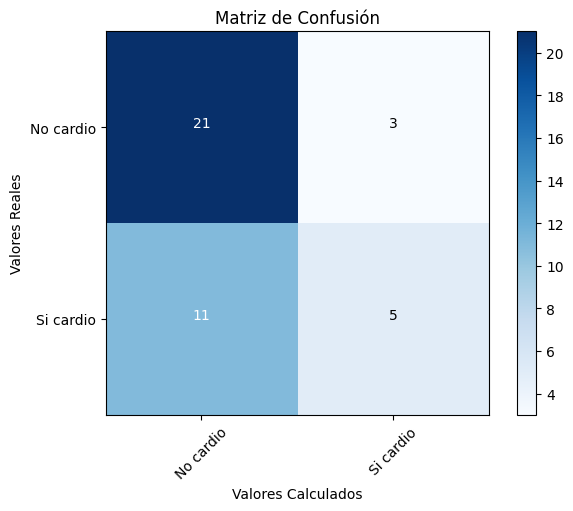

In [12]:
plot_confusion_matrix(confusion_matrix, classes=class_names)    
plt.show()

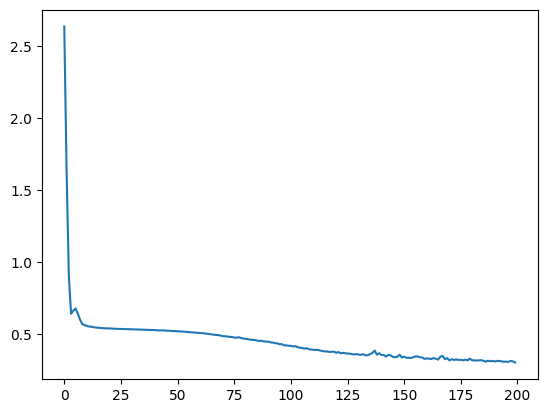

In [13]:
plt.plot(historial.history['loss']) 
plt.show()

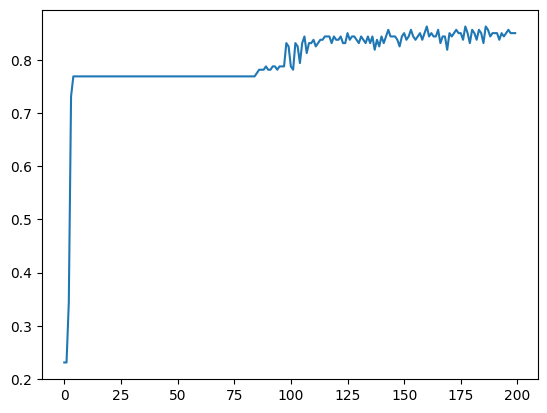

In [14]:
plt.plot(historial.history['accuracy'])  
plt.show()